In [1]:
import os
import re
import time
import glob

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from filter_files import get_filenames

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Concatenate all the files

In [12]:
simul_path = 'data/spectra/simulated_data/'
filenames = get_filenames(simul_path)

simul_files = sorted(glob.glob(simul_path + ), key=lambda x: int(re.search(r'\d+', x).group()))

print(simul_files)



TypeError: expected str, bytes or os.PathLike object, not Series

In [4]:
# get file names from filter_files.py
recon_path = 'data/spectra/reconstructed/rf/'
sig_path = 'data/spectra/simulated_data/'

recon_files = sorted(glob.glob(recon_path + 'recon_param_data_less*.txt'), key=lambda x: int(re.search(r'\d+', x).group()))
sig_files = sorted(glob.glob(sig_path + 'model_parameters_data*.txt'), key=lambda x: int(re.search(r'\d+', x).group()))

filenames = get_filenames(sig_path)


params_path = 'data/params/'
write_data = open(params_path + 'reconstructed_data_less_rf.txt', 'w')
write_params  = open('model_parameters_all.txt', 'w')

print(filenames)



0           model_parameters_data0.txt
1           model_parameters_data1.txt
2           model_parameters_data6.txt
3           model_parameters_data8.txt
4           model_parameters_data9.txt
                     ...              
10933    model_parameters_data4991.txt
10934    model_parameters_data4992.txt
10935    model_parameters_data4994.txt
10936    model_parameters_data4995.txt
10937    model_parameters_data4998.txt
Name: filename, Length: 10938, dtype: object


In [6]:
len(sig_files)

5000

In [7]:
# get the params data
df_param = pd.DataFrame()
for file in sig_files:
    # get the parameters used
    df_param = df_param.append(pd.read_csv(file, skiprows=1, nrows=6, header=None, sep=' ', names=['A', 'B', 'C', 'D']))
    # save the dataframe to a csv file
    df_param.to_csv(params_path + 'model_parameters_data.csv', index=False)
    

#### Load the files 

In [8]:
start_time = time.time()
df_recon = pd.read_csv(params_path + 'reconstructed_data_less_rf.txt', sep=' ', header=None) # all data dataframe
df_data = pd.read_csv(params_path + 'model_parameters_data_all.txt', sep=' ', header=None) # all data dataframe
print(time.time() - start_time)
# df_data.head()

51.92849373817444


In [9]:
# get the last 15000 from the df_data datatrame, to get the 
# the data points that was used in the prediction of the parameterss
df_sig = df_data.iloc[-39550000:]

In [10]:
df_recon.head()

,0,1
0,238.85800,0.000055
1,238.85801,0.000054
2,238.85802,0.000053
3,238.85803,0.000051
4,238.85804,0.000050


In [11]:
df_sig.head()

,0,1
138950000,238.91400,0.013470
138950001,238.91401,0.013304
138950002,238.91402,0.013140
138950003,238.91403,0.012977
138950004,238.91404,0.012817


In [12]:
print("Recon Shape: ", df_recon.shape,"Original sig Shape: ", df_sig.shape)

Recon Shape:  (39055800, 2) Original sig Shape:  (39550000, 2)


In [13]:
columns = ['Frequency', 'Intensity']
df_recon.columns = columns
df_sig.columns =  columns 

In [14]:
df_sig.head()

,Frequency,Intensity
138950000,238.91400,0.013470
138950001,238.91401,0.013304
138950002,238.91402,0.013140
138950003,238.91403,0.012977
138950004,238.91404,0.012817


In [15]:
df_recon.head()

,Frequency,Intensity
0,238.85800,0.000055
1,238.85801,0.000054
2,238.85802,0.000053
3,238.85803,0.000051
4,238.85804,0.000050


In [16]:
# get the frequency and intensity of the original synthethic spectra
freq_sig = np.array(np.array_split(df_sig['Frequency'], len(recon_files)))
inten_sig = np.array(np.array_split(df_sig['Intensity'], len(recon_files)))


# get the frequency and intensity of the predicted spectra
freq_recon = np.array(np.array_split(df_recon['Frequency'], len(recon_files)))
inten_recon = np.array(np.array_split(df_recon['Intensity'], len(recon_files)))

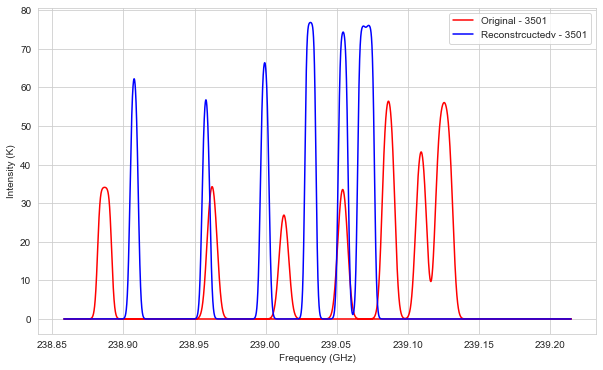

In [19]:
# plot the signal in one plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[0],  inten_sig[0], color='r', label='Original - 3501')
plt.plot(freq_recon[0], inten_recon[0], color='b', label="Reconstrcuctedv - 3501")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_3501.png')
plt.show()

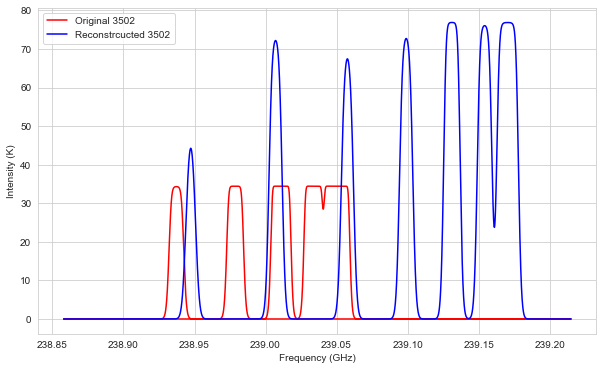

In [20]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[1],  inten_sig[1], color='r', label='Original 3502')
plt.plot(freq_recon[1], inten_recon[1], color='b', label="Reconstrcucted 3502")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_3502.png')
plt.show()

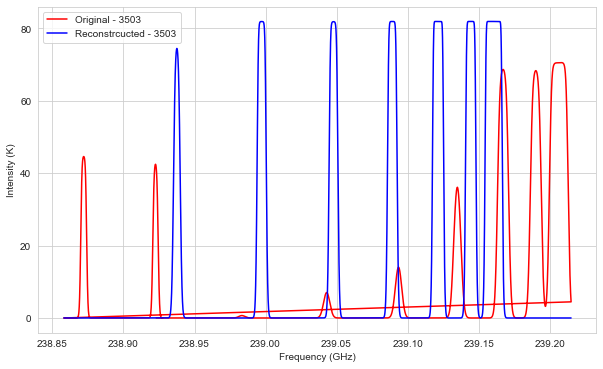

In [21]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[2],  inten_sig[2], color='r', label='Original - 3503')
plt.plot(freq_recon[2], inten_recon[2], color='b', label="Reconstrcucted - 3503")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_3503.png')
plt.show()

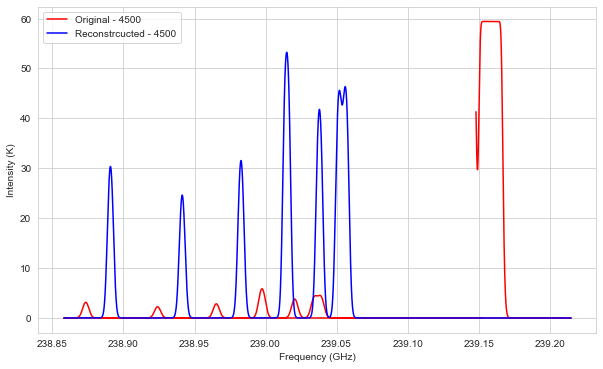

In [22]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[1000],  inten_sig[1000], color='r', label='Original - 4500')
plt.plot(freq_recon[1000], inten_recon[1000], color='b', label="Reconstrcucted - 4500")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_4500.png')
plt.show()

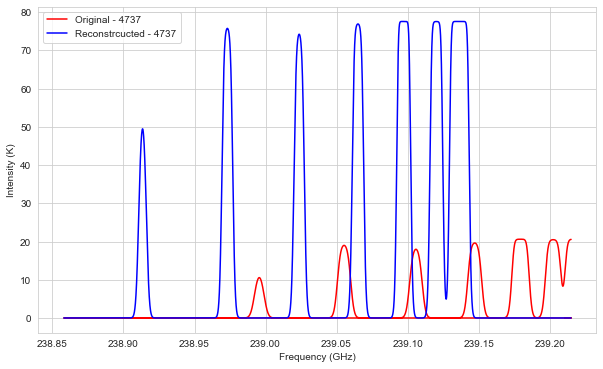

In [23]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[1093],  inten_sig[1093], color='r', label='Original - 4737')
plt.plot(freq_recon[1093], inten_recon[1093], color='b', label="Reconstrcucted - 4737")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_4737.png')
plt.show()

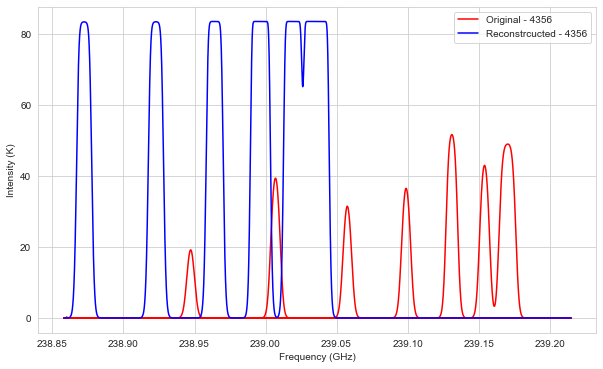

In [24]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[856],  inten_sig[856], color='r', label='Original - 4356')
plt.plot(freq_recon[856], inten_recon[856], color='b', label="Reconstrcucted - 4356")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_4356.png')
plt.show()

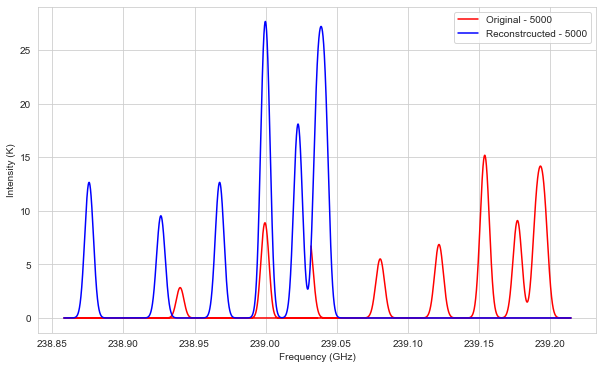

In [25]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[500],  inten_sig[500], color='r', label='Original - 5000')
plt.plot(freq_recon[500], inten_recon[500], color='b', label="Reconstrcucted - 5000")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_5000.png')
plt.show()

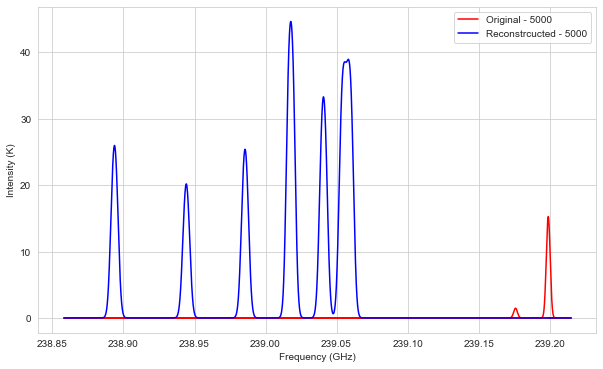

In [26]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[300],  inten_sig[300], color='r', label='Original - 5000')
plt.plot(freq_recon[300], inten_recon[300], color='b', label="Reconstrcucted - 5000")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_5000.png')
plt.show()